# SGEMM GPU Kernel Performance

## Description

The SGEMM GPU Kernel Performance dataset measures the running time of a product between two matrices of size 2048 x 2048 using a parametrizable SGEMM GPU kernal with 241600 possible parameter contributions. Each of the combinations are representated by a single row in the dataset, along with 4 test runtimes in the last four columns.

The column attributes are as follows:

| Column Name | Notation | Range | Description |
| - | - | - | - |
| mwg | MWG | {16, 32, 64, 128} | Per-matrix 2D tiling at workgroup level |
| nwg | NWG | {16, 32, 64, 128} | Per-matrix 2D tiling at workgroup level |
| kwg | KWG | {16, 32} | Inner dimension of 2D tiling at workgroup level |
| mdimc | MDIMC | {8, 16, 32} | Local workgroup size |
| ndimc | NDIMC | {8, 16, 32} | Local workgroup size |
| mdima | MDIMA | {8, 16, 32} | Local memory shape |
| ndimb | NDIMB | {8, 16, 32} | Local memory shape |
| kwi | KWI | {2, 8} | Kernel loop unrolling factor |
| vwm | VWM | {1, 2, 4, 8} | Per-matrix vector widths for loading and storing |
| vwn | VWN | {1, 2, 4, 8} | Per-matrix vector widths for loading and storing |
| strm | STRM | {0, 1} | Enabling of stride for accessing off-chip memory within a single thread |
| strn | STRN | {0, 1} | Enabling of stride for accessing off-chip memory within a single thread |
| sa | SA | {0, 1} | Per-matrix manual caching of the 2D workgroup tile |
| sb | SB | {0, 1} | Per-matrix manual caching of the 2D workgroup tile |
| run1 | - | - | Run 1 result in milliseconds |
| run2 | - | - | Run 2 result in milliseconds |
| run3 | - | - | Run 3 result in milliseconds |
| run4 | - | - | Run 4 result in milliseconds |

[Source](http://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance)

## Importing the Dataset

In [1]:
import pandas as pd

column_names = ['mwg',
                'nwg',
                'kwg',
                'mdimc',
                'ndimc',
                'mdima',
                'ndimb',
                'kwi',
                'vwm',
                'vwn',
                'strm',
                'strn',
                'sa',
                'sb',
                'run1',
                'run2',
                'run3',
                'run4']

features = column_names[:-4]
target = 'target'

with open("../../datasets/regression/sgemm_product.csv", "r") as dataset_file:
    raw_data = pd.read_csv(dataset_file, delimiter=',', header=0, names=column_names)

## Preparing the Dataset

In [2]:
prepared_data = raw_data
prepared_data['target'] = prepared_data[column_names[-4:]].mean(axis=1)

The following block prints the shape and column datatypes of the processed dataset.

In [3]:
print(prepared_data.shape)
print(prepared_data.dtypes)

(241600, 19)
mwg         int64
nwg         int64
kwg         int64
mdimc       int64
ndimc       int64
mdima       int64
ndimb       int64
kwi         int64
vwm         int64
vwn         int64
strm        int64
strn        int64
sa          int64
sb          int64
run1      float64
run2      float64
run3      float64
run4      float64
target    float64
dtype: object


## Preprocessing the Dataset

In [4]:
from sklearn.model_selection import train_test_split

X_full = prepared_data[features].copy()
y_full = prepared_data[target].copy()

# Split the dataset into two parts, one part training, the other, testing and validating.
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X_full, y_full, 
                                                        train_size=0.6,
                                                        random_state=0)
# Split the second part from the previous split into two parts, one part testing, the other, validating.
X_test, X_val, y_test, y_val = train_test_split(X_test_and_val, y_test_and_val, 
                                                        train_size=0.5,
                                                        random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit scaler to data then transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test and validation data without fitting.
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Training on Multiple Regressors

In [6]:
#Manage imports 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from utilities import train_estimators, plot_estimator_scores

### Logistic Regression Classification

In [7]:
LinearRegressionEstimator = LinearRegression().fit(X_train_scaled, y_train)
LR_train_score = LinearRegressionEstimator.score(X_train_scaled, y_train)
LR_test_score = LinearRegressionEstimator.score(X_test_scaled, y_test)
LR_val_score = LinearRegressionEstimator.score(X_val_scaled, y_val)
print(f'{LR_train_score=}, {LR_test_score=}, {LR_val_score=}')

LR_train_score=0.4087357257864952, LR_test_score=0.40302393266756387, LR_val_score=0.4079197586307861


### SVM Classification

In [8]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

SVMEstimators = train_estimators(X_train_scaled, y_train,
                                    SVR,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Decision Tree Classification

Training DecisionTreeRegressor(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=100, splitter='random', random_state=0)...


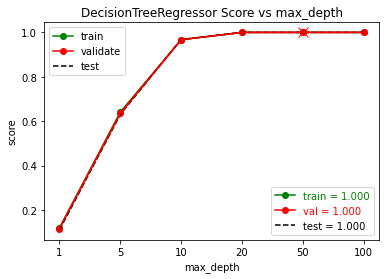

In [8]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(X_train_scaled, y_train,
                                            DecisionTreeRegressor,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Random Forest Classification

Training RandomForestRegressor(max_depth=1, random_state=0)...
Training RandomForestRegressor(max_depth=5, random_state=0)...
Training RandomForestRegressor(max_depth=10, random_state=0)...
Training RandomForestRegressor(max_depth=20, random_state=0)...
Training RandomForestRegressor(max_depth=50, random_state=0)...
Training RandomForestRegressor(max_depth=100, random_state=0)...


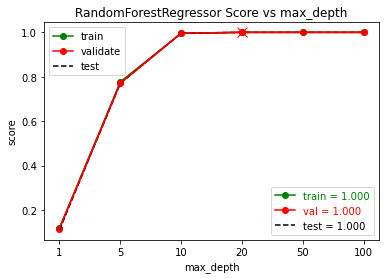

In [9]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(X_train_scaled, y_train,
                                        RandomForestRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### K-Nearest Neighbours Classification

Training KNeighborsRegressor(weights=uniform, n_neighbors=2)...
Training KNeighborsRegressor(weights=distance, n_neighbors=2)...


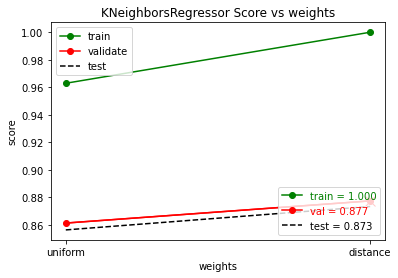

In [10]:
adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

In [11]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

Training KNeighborsRegressor(algorithm=auto, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=brute, n_neighbors=2)...


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

### Ada Boost Classification

In [12]:
adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(X_train_scaled, y_train,
                                        AdaBoostRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

Training AdaBoostRegressor(n_estimators=10, random_state=0)...
Training AdaBoostRegressor(n_estimators=50, random_state=0)...
Training AdaBoostRegressor(n_estimators=100, random_state=0)...


KeyboardInterrupt: 

## Gaussian Naive Bayes Classification

In [13]:
gaussian_nb = GaussianProcessRegressor()
NaiveBayesEstimator = gaussian_nb.fit(X_train, y_train)
gaussian_nb_train_score = NaiveBayesEstimator.score(X_train, y_train)
gaussian_nb_test_score =  NaiveBayesEstimator.score(X_test, y_test)
gaussian_nb_val_score =  NaiveBayesEstimator.score(X_val, y_val)
print(f'{gaussian_nb_train_score=}, {gaussian_nb_val_score=}, {gaussian_nb_test_score=}')

MemoryError: Unable to allocate 157. GiB for an array with shape (144960, 144960) and data type float64